In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn.cluster import KMeans
from fase2_funciones import *

In [16]:
df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']
df_bd_preprocesada_New= df_bd_preprocesada

In [24]:
df_bd_aux=df_bd_preprocesada_New.drop(['StockCode','Description','Country','Fecha','Hora'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
df_bd_Normalizada

InvoiceNo  Quantity  UnitPrice  CustomerID     Monto
0             0.0  0.000062   0.000313    0.926443  0.000091
1             0.0  0.000062   0.000416    0.926443  0.000121
2             0.0  0.000086   0.000338    0.926443  0.000131
3             0.0  0.000062   0.000416    0.926443  0.000121
4             0.0  0.000062   0.000416    0.926443  0.000121
...           ...       ...        ...         ...       ...
392727        1.0  0.000136   0.000104    0.056219  0.000061
392728        1.0  0.000062   0.000258    0.056219  0.000075
392729        1.0  0.000037   0.000510    0.056219  0.000099
392730        1.0  0.000037   0.000510    0.056219  0.000099
392731        1.0  0.000025   0.000608    0.056219  0.000088

[392732 rows x 5 columns]

In [18]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(df_bd_Normalizada)
    wcss.append(kmeans.inertia_)

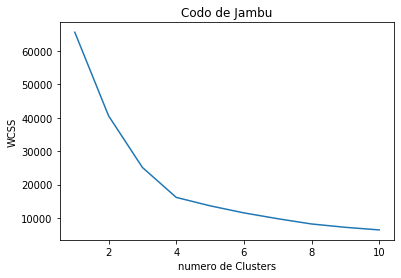

In [19]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
from sklearn.decomposition import PCA #analisis de componentes principales
pca = PCA(n_components=2)
pca.fit(df_bd_Normalizada)
X_reduced = pca.transform(df_bd_Normalizada)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (392732, 2)


In [26]:
clustering = KMeans(n_clusters = 3, max_iter=300)
clustering.fit(df_bd_Normalizada)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_
print(etiquetas)

[0 0 0 ... 2 2 2]


In [29]:
df_bd_preprocesada_New['Kmeans_Clusters'] = clustering.labels_
df_bd_preprocesada_New

InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
392727     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
392728     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
392729     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
392730     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
392731     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  CustomerID         Country      Fecha   Hora  Monto  \
0            2.55     17850.0  United Kingdom  12/1/2010   8:26  15.30   
1            3.39     17850.0  United Kingdom  12/1/2010   8:26  20.34   
2            2.75     17850.0  United Kingdom  12/1/2010   8:26  22.00   
3            3.39     17850.0  United Kingdom  12/1/2010   8:26  20.34   
4            3.39     17850.0  United Kingdom  12/1/2010   8:26  20.34   
...           ...         ...             ...        ...    ...    ...   
392727       0.85     12680.0          France  12/9/2011  12:50  10.20   
392728       2.10     12680.0          France  12/9/2011  12:50  12.60   
392729       4.15     12680.0          France  12/9/2011  12:50  16.60   
392730       4.15     12680.0          France  12/9/2011  12:50  16.60   
392731       4.95     12680.0          France  12/9/2011  12:50  14.85   

        Kmeans_Clusters  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
392727                2  
392728                2  
392729                2  
392730                2  
392731                2  

[392732 rows x 11 columns]

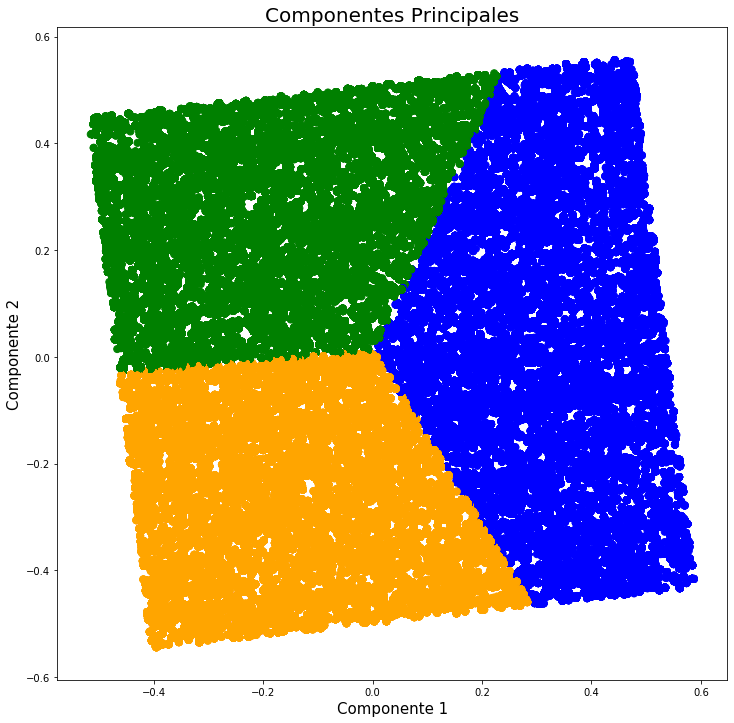

In [42]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","orange"])

ax.scatter( x= pca_Data_Retail.Componente1,
            y= pca_Data_Retail.Componente2,
            c=color_theme[pca_Data_Retail.Kmeans_Clusters],
            s=50)

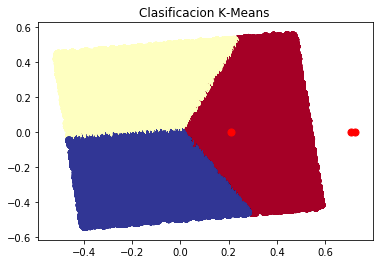

In [39]:
y_pred = clustering.predict(df_bd_Normalizada)


pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 
pl.scatter(centroides[:, 0], centroides[:, 1], c='red',s=50)
plt.title('Clasificacion K-Means ')
plt.show()

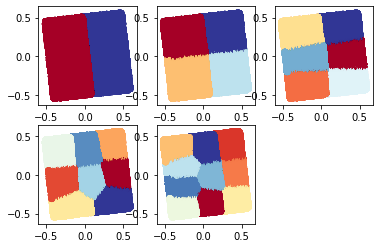

In [41]:
plt.subplot(2,3,1)
clustering = KMeans(n_clusters = 2, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,2)
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,3)
clustering = KMeans(n_clusters = 6, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,4)
clustering = KMeans(n_clusters = 8, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,5)
clustering = KMeans(n_clusters = 10, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 